during the ETLT
1. combine both motorist and sgcarmart
2. names to be extracted -> brand and model 
3. fetch data from API
4. combine both APIs together to get 1 dataset
5. derive the vehicle classes
6. fetch the COE prices

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.cloud import bigquery
pd.set_option('display.max_columns', None)

In [2]:
# read dataset first
# data = pd.read_csv('../Datasets/final_combined_dataset.csv')

path_to_private_key = 'is3107-418903-a6116d294003.json'
bigquery_client = bigquery.Client.from_service_account_json(json_credentials_path=path_to_private_key)

sql = """
        SELECT * FROM `is3107-418903.final.carsCombinedFinal`
        """
data = bigquery_client.query(sql).to_dataframe()

In [3]:
data = data.dropna()

In [4]:
data

,owners,eng_cap,price,depreciation,mileage,power,coe_left,omv,arf,accessories,make,year,model_trim,model_body,model_seats,model_weight_kg,model_engine_fuel,model_engine_cyl,model_drive,model_transmission_type,model_fuel_cap_l,vehicle_class,coe_bidding_no,coe_premium,coe_month,date_listed
0,6,1984.0,83800.0,16750.0,117160.0,132.0,5.00,38191.0,40468.0,"Premium upholstery leather seats, upgraded exp...",audi,2013,26514,Sedan,5,1689.795918,Gasoline - Premium,4,AWD,CVT,74.9430,Category B,2,97000,2024-02,2024-02-24 00:00:00.000000
1,1,1984.0,120800.0,13380.0,75500.0,132.0,9.02,38168.0,40436.0,Electric seats. Auto tailgate. Keyless entry w...,audi,2013,26514,Sedan,5,1689.795918,Gasoline - Premium,4,AWD,CVT,74.9430,Category B,2,102001,2024-04,2024-04-18 00:00:00.000000
2,6,1984.0,129800.0,14870.0,142926.0,155.0,8.72,45182.0,45182.0,"19'' forge rims,Rs Body kit, ambient lighting,...",audi,2013,26493,Sedan,5,1591.383220,Gasoline - Premium,4,AWD,CVT,63.9665,Category B,2,102001,2024-04,2024-04-20 00:00:00.000000
3,6,1984.0,121800.0,13970.0,142926.0,155.0,8.71,45182.0,45182.0,"19'' forge rims,Rs Body kit, ambient lighting,...",audi,2013,26493,Sedan,5,1591.383220,Gasoline - Premium,4,AWD,CVT,63.9665,Category B,2,102001,2024-04,2024-04-24 00:00:00.000000
4,1,3456.0,260000.0,36670.0,72000.0,264.0,4.04,139546.0,223183.0,"Heads up display, keyless entry, massage chair...",lexus,2018,14051,Sedan,5,2134.693878,premium unleaded (required),V6,rear wheel drive,10-speed shiftable automatic,82.1345,Category B,2,102001,2024-04,2024-04-17 00:00:00.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9550,1,1598.0,88900.0,15090.0,80885.0,96.0,5.18,20881.0,21234.0,Your wallet friendly Elegance high spec select...,toyota,2019,11870,Sedan,5,1287.981859,regular unleaded,I4,front wheel drive,continuously variable-speed automatic,49.9620,Category A,2,94010,2024-04,2024-04-20 00:00:00.000000
9551,2,1598.0,61800.0,14600.0,77000.0,96.0,3.46,21690.0,22366.0,"Leather seats,sports rims,audio sound system w...",toyota,2017,17912,Sedan,5,1299.319728,regular unleaded,I4,front wheel drive,continuously variable-speed automatic,49.9620,Category A,2,94010,2024-04,2024-04-20 00:00:00.000000
9552,3,1598.0,52800.0,14410.0,99000.0,90.0,2.97,19990.0,19990.0,"Leather seats, sports rims, Toyota DVD player ...",toyota,2017,17912,Sedan,5,1299.319728,regular unleaded,I4,front wheel drive,continuously variable-speed automatic,49.9620,Category A,2,94010,2024-04,2024-04-23 00:00:00.000000
9553,3,1598.0,53800.0,14760.0,99000.0,90.0,2.97,19990.0,19990.0,"Leather seats, sports rims, Toyota DVD player ...",toyota,2017,17912,Sedan,5,1299.319728,regular unleaded,I4,front wheel drive,continuously variable-speed automatic,49.9620,Category A,2,94010,2024-04,2024-04-23 00:00:00.000000


# Data Processing

In [5]:
# checking the data types
data.dtypes

owners                       Int64
eng_cap                    float64
price                      float64
depreciation               float64
mileage                    float64
power                      float64
coe_left                   float64
omv                        float64
arf                        float64
accessories                 object
make                        object
year                         Int64
model_trim                  object
model_body                  object
model_seats                  Int64
model_weight_kg            float64
model_engine_fuel           object
model_engine_cyl            object
model_drive                 object
model_transmission_type     object
model_fuel_cap_l           float64
vehicle_class               object
coe_bidding_no               Int64
coe_premium                  Int64
coe_month                   object
date_listed                 object
dtype: object

In [6]:
# # converting to integers
# data['model_year'] = data['model_year'].astype("Int64")
# data['model_seats'] = data['model_seats'].astype("Int64")

# # 2dp 
# data['model_weight_kg'] = data['model_weight_kg'].round(2)
# data['model_fuel_cap_l'] = data['model_fuel_cap_l'].round(2)

# # converting to datetime
# data['reg_date'] = pd.to_datetime(data['reg_date'])

# drop model trim
columns_to_drop = ['model_trim', 'accessories', 'vehicle_class', 'coe_month', 'date_listed', 'coe_bidding_no']
data = data.drop(columns=columns_to_drop)

## Encoding Model Body

In [7]:
# before replacing data 
print(data['model_body'].value_counts())

model_body
Sedan                           2065
SUV                             1695
Hatchback                       1148
Coupe                            654
Convertible                      531
Compact Cars                     340
Midsize Cars                     184
Sport Utility Vehicles           163
Minivan                          125
Large Cars                        59
Wagon                             39
Mini Compact Cars                 37
Two Seaters                       36
Subcompact Cars                   24
Station Wagon                     23
Roadster                           5
Small Station Wagons               3
Crossover                          2
Not Available                      2
Small Sport Utility Vehicles       1
Name: count, dtype: int64


In [8]:
data.iloc[0]['model_body'].lower()

'sedan'

In [9]:
# encode model_body

for index, row in data.iterrows():
    row['model_body'] = row['model_body'].lower()
    if 'sport' in row['model_body'] or 'suv' in row['model_body'] or 'crossover' in row['model_body']:
        data.at[index, 'model_body'] ='SUV'
    elif 'compact' in row['model_body'] or 'subcompact' in row['model_body'] or 'sedan' in row['model_body'] or 'large' in row['model_body'] or 'midsize' in row['model_body']:
        data.at[index, 'model_body'] ='Sedan'
    elif 'coupe' in row['model_body'] or 'convertible' in row['model_body'] or 'two seaters' in row['model_body'] or 'roadster' in row['model_body']:
        data.at[index, 'model_body'] ='Coupe'
    elif 'wagon' in row['model_body'] or 'hatchback' in row['model_body'] or 'minivan' in row['model_body']:
        data.at[index, 'model_body'] ='Wagon'
    else:
        data.at[index, 'model_body'] ='Others'
        
# after replacing data 
print(data['model_body'].value_counts())

# nominal encoding
data = pd.get_dummies(data, columns=['model_body'], drop_first=True)

model_body
Sedan     2709
SUV       1861
Wagon     1338
Coupe     1226
Others       2
Name: count, dtype: int64


## Encoding Model Transmission Type

In [10]:
# before replacing data 
print(data['model_transmission_type'].value_counts())

model_transmission_type
8-speed shiftable automatic              1370
Manual                                    802
Automatic                                 789
7-speed automated manual                  758
continuously variable-speed automatic     663
6-speed shiftable automatic               644
6-speed manual                            634
9-speed shiftable automatic               466
7-speed shiftable automatic               290
Automated Manual                          144
6-speed automated manual                  133
5-speed manual                            119
8-speed automatic                          70
4-speed automatic                          59
6-speed automatic                          59
8-speed automated manual                   50
7-speed manual                             26
CVT                                        18
10-speed shiftable automatic               17
7-speed automatic                          13
7-speed automatic                           4
6-speed ma

In [11]:
data['model_transmission_type'].dtype

dtype('O')

In [12]:
# encode transmission_type
for index, row in data.iterrows():
    row['model_transmission_type'] = row['model_transmission_type'].lower()
    if 'continuously' in row['model_transmission_type'] or 'single speed' in row['model_transmission_type'] or 'cvt' in row['model_transmission_type']:
        data.at[index, 'model_transmission_type'] ='CVT'
    elif 'automatic' in row['model_transmission_type']:
        data.at[index, 'model_transmission_type'] ='Automatic'
    elif 'manual' in row['model_transmission_type']:
        data.at[index, 'model_transmission_type'] ='Manual'
    elif 'automated manual' in row['model_transmission_type']:
        data.at[index, 'model_transmission_type'] ='Automated Manual'
    else:
        data.at[index, 'model_transmission_type'] ='Others'

# after replacing data
print(data['model_transmission_type'].value_counts())

# nominal encoding
data = pd.get_dummies(data, columns=['model_transmission_type'], drop_first=True)


model_transmission_type
Automatic    3783
Manual       2669
CVT           684
Name: count, dtype: int64


## Encoding Model Drive

In [13]:
# before replacing data 
print(data['model_drive'].value_counts())

model_drive
front wheel drive    2186
all wheel drive      1831
rear wheel drive     1050
Front                 504
Front Wheel Driv      438
Rear                  325
Rear Wheel Drive      323
AWD                   151
four wheel drive      119
All Wheel Drive        96
4WD                    78
AWD                    24
Four Wheel Drive       11
Name: count, dtype: int64


In [14]:
#encode model_drive
for index, row in data.iterrows():
    row['model_drive'] = row['model_drive'].lower()
    if 'all' in row['model_drive'] or '4wd' in row['model_drive'] or 'awd' in row['model_drive'] or 'four' in row['model_drive']:
        data.at[index, 'model_drive'] ='All Wheel Drive'
    elif 'front' in row['model_drive']:
        data.at[index, 'model_drive'] ='Front Wheel Drive'
    elif 'rear' in row['model_drive']:
        data.at[index, 'model_drive'] ='Rear Wheel Drive'
    else:
        data.at[index, 'model_drive'] ='Others'
        

# after replacing data
print(data['model_drive'].value_counts())

# nominal encoding
data = pd.get_dummies(data, columns=['model_drive'], drop_first=True)

model_drive
Front Wheel Drive    3128
All Wheel Drive      2310
Rear Wheel Drive     1698
Name: count, dtype: int64


## Encoding Model Engine Fuel

In [15]:
# before replacing data 
print(data['model_engine_fuel'].value_counts())

model_engine_fuel
premium unleaded (required)                     2248
regular unleaded                                1611
premium unleaded (recommended)                  1231
Gasoline                                         744
Premium Unleaded (Required)                      353
Regular Unleaded                                 268
Gasoline - Premium                               221
Diesel                                           150
Premium Unleaded (Recommended)                   143
diesel fuel                                       66
Premium                                           33
Gasoline / Electric Hybrid                        31
flex-fuel (premium unleaded recommended/E85)      20
flex-fuel (premium unleaded required/E85)         10
Diesel / Electric Hybrid                           4
Electric                                           3
Name: count, dtype: int64


In [16]:
# encode transmission_type
for index, row in data.iterrows():
    row['model_engine_fuel'] = row['model_engine_fuel'].lower()
    if 'premium' in row['model_engine_fuel']:
        data.at[index, 'model_engine_fuel'] ='Premium'
    elif 'regular' in row['model_engine_fuel']:
        data.at[index, 'model_engine_fuel'] ='Regular'
    elif 'hybrid' in row['model_engine_fuel'] or 'gasoline' in row['model_engine_fuel']:
        data.at[index, 'model_engine_fuel'] ='Hybrid'
    elif 'gasoline' in row['model_engine_fuel']:
        data.at[index, 'model_engine_fuel'] ='Regular'
    elif 'diesel' in row['model_engine_fuel']:
        data.at[index, 'model_engine_fuel'] ='Diesel'
    elif 'electric' in row['model_engine_fuel']:
        data.at[index, 'model_engine_fuel'] ='Electric'
    else:
        print(row['model_engine_fuel'])
        data.at[index, 'model_engine_fuel'] ='Others'

# after replacing data

print(data['model_engine_fuel'].value_counts())


# nominal encoding
data = pd.get_dummies(data, columns=['model_engine_fuel'], drop_first=True)


model_engine_fuel
Premium     4259
Regular     1879
Hybrid       779
Diesel       216
Electric       3
Name: count, dtype: int64


## Encoding Model Engine Cylinders

In [17]:
# before replacing data 
print(data['model_engine_cyl'].value_counts())

model_engine_cyl
I4        3545
4         1195
V6         660
V8         374
6          371
flat 4     255
8          217
I6         184
12          58
10          44
5           43
flat 6      43
W12         36
I3          33
V10         21
I5          20
2           16
V12         15
3            6
Name: count, dtype: int64


In [18]:
# convert all values to string first
data['model_engine_cyl'] = data['model_engine_cyl'].astype("string")

for index, row in data.iterrows():
    row['model_engine_cyl'] = row['model_engine_cyl'].lower()
    if '2' in row['model_engine_cyl']:
        data.at[index, 'model_engine_cyl'] ='2'
    elif '3' in row['model_engine_cyl']:
        data.at[index, 'model_engine_cyl'] ='3'
    elif '4' in row['model_engine_cyl']:
        data.at[index, 'model_engine_cyl'] ='4'
    elif '5' in row['model_engine_cyl']:
        data.at[index, 'model_engine_cyl'] ='5'
    elif '6' in row['model_engine_cyl']:
        data.at[index, 'model_engine_cyl'] ='6'
    elif '8' in row['model_engine_cyl']:
        data.at[index, 'model_engine_cyl'] ='8'
    elif '10' in row['model_engine_cyl']:
        data.at[index, 'model_engine_cyl'] ='10'
    elif '12' in row['model_engine_cyl']:
        data.at[index, 'model_engine_cyl'] ='12'

    

#convert back to int
data['model_engine_cyl'] = data['model_engine_cyl'].astype("Int64")
# after replacing data
print(data['model_engine_cyl'].value_counts())

model_engine_cyl
4     4995
6     1258
8      591
2      125
10      65
5       63
3       39
Name: count, dtype: Int64


# Change reg_date into numerical data

In [19]:
data['years_since_reg'] = 0

for index, row in data.iterrows():
    year = row['year']
    data.at[index, 'years_since_reg'] = 2024-year

data = data.drop(columns=['year'])

In [20]:
data

,owners,eng_cap,price,depreciation,mileage,power,coe_left,omv,arf,make,model_seats,model_weight_kg,model_engine_cyl,model_fuel_cap_l,coe_premium,model_body_Others,model_body_SUV,model_body_Sedan,model_body_Wagon,model_transmission_type_CVT,model_transmission_type_Manual,model_drive_Front Wheel Drive,model_drive_Rear Wheel Drive,model_engine_fuel_Electric,model_engine_fuel_Hybrid,model_engine_fuel_Premium,model_engine_fuel_Regular,years_since_reg
0,6,1984.0,83800.0,16750.0,117160.0,132.0,5.00,38191.0,40468.0,audi,5,1689.795918,4,74.9430,97000,False,False,True,False,True,False,False,False,False,False,True,False,11
1,1,1984.0,120800.0,13380.0,75500.0,132.0,9.02,38168.0,40436.0,audi,5,1689.795918,4,74.9430,102001,False,False,True,False,True,False,False,False,False,False,True,False,11
2,6,1984.0,129800.0,14870.0,142926.0,155.0,8.72,45182.0,45182.0,audi,5,1591.383220,4,63.9665,102001,False,False,True,False,True,False,False,False,False,False,True,False,11
3,6,1984.0,121800.0,13970.0,142926.0,155.0,8.71,45182.0,45182.0,audi,5,1591.383220,4,63.9665,102001,False,False,True,False,True,False,False,False,False,False,True,False,11
4,1,3456.0,260000.0,36670.0,72000.0,264.0,4.04,139546.0,223183.0,lexus,5,2134.693878,6,82.1345,102001,False,False,True,False,False,False,False,True,False,False,True,False,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9550,1,1598.0,88900.0,15090.0,80885.0,96.0,5.18,20881.0,21234.0,toyota,5,1287.981859,4,49.9620,94010,False,False,True,False,True,False,True,False,False,False,False,True,5
9551,2,1598.0,61800.0,14600.0,77000.0,96.0,3.46,21690.0,22366.0,toyota,5,1299.319728,4,49.9620,94010,False,False,True,False,True,False,True,False,False,False,False,True,7
9552,3,1598.0,52800.0,14410.0,99000.0,90.0,2.97,19990.0,19990.0,toyota,5,1299.319728,4,49.9620,94010,False,False,True,False,True,False,True,False,False,False,False,True,7
9553,3,1598.0,53800.0,14760.0,99000.0,90.0,2.97,19990.0,19990.0,toyota,5,1299.319728,4,49.9620,94010,False,False,True,False,True,False,True,False,False,False,False,True,7


## Encoding Model
we will classify the car models into 3 categories

In [21]:
brands = {
    'budget' : ['Chevrolet', 'Citroen', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Kia', 'Mazda', 'Mitsubishi', 'Nissan', 'Peugeot', 'Renault', 'Skoda', 'Ssangyong', 'Subaru', 'Suzuki', 'Toyota', 'Daihatsu', 'Proton'],
    'mid' : ['Alfa Romeo', 'Chrysler', 'Infiniti', 'MINI', 'Opel', 'Saab', 'Volkswagen', 'Audi', 'BMW', 'Jaguar', 'Jeep', 'Lexus', 'Lotus', 'Mercedes-Benz', 'Mercedes Benz', 'Mitsuoka', 'Volvo', 'Dodge Journey'],
    'exotic' : ['Aston Martin', 'Ferrari', 'Lamborghini', 'McLaren', 'Bentley', 'Land-Rover', 'Land Rover', 'Maserati', 'Porsche', 'Rolls-Royce', 'Rolls Royce']
}

In [22]:
data['brands'] = "others"

for index, row in data.iterrows():
    model = str(row['make'])
    for group, brand_list in brands.items():
        for brand in brand_list:
            if brand.lower() in model.lower():
                data.at[index, 'brands'] = group


In [23]:
data

,owners,eng_cap,price,depreciation,mileage,power,coe_left,omv,arf,make,model_seats,model_weight_kg,model_engine_cyl,model_fuel_cap_l,coe_premium,model_body_Others,model_body_SUV,model_body_Sedan,model_body_Wagon,model_transmission_type_CVT,model_transmission_type_Manual,model_drive_Front Wheel Drive,model_drive_Rear Wheel Drive,model_engine_fuel_Electric,model_engine_fuel_Hybrid,model_engine_fuel_Premium,model_engine_fuel_Regular,years_since_reg,brands
0,6,1984.0,83800.0,16750.0,117160.0,132.0,5.00,38191.0,40468.0,audi,5,1689.795918,4,74.9430,97000,False,False,True,False,True,False,False,False,False,False,True,False,11,mid
1,1,1984.0,120800.0,13380.0,75500.0,132.0,9.02,38168.0,40436.0,audi,5,1689.795918,4,74.9430,102001,False,False,True,False,True,False,False,False,False,False,True,False,11,mid
2,6,1984.0,129800.0,14870.0,142926.0,155.0,8.72,45182.0,45182.0,audi,5,1591.383220,4,63.9665,102001,False,False,True,False,True,False,False,False,False,False,True,False,11,mid
3,6,1984.0,121800.0,13970.0,142926.0,155.0,8.71,45182.0,45182.0,audi,5,1591.383220,4,63.9665,102001,False,False,True,False,True,False,False,False,False,False,True,False,11,mid
4,1,3456.0,260000.0,36670.0,72000.0,264.0,4.04,139546.0,223183.0,lexus,5,2134.693878,6,82.1345,102001,False,False,True,False,False,False,False,True,False,False,True,False,6,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9550,1,1598.0,88900.0,15090.0,80885.0,96.0,5.18,20881.0,21234.0,toyota,5,1287.981859,4,49.9620,94010,False,False,True,False,True,False,True,False,False,False,False,True,5,budget
9551,2,1598.0,61800.0,14600.0,77000.0,96.0,3.46,21690.0,22366.0,toyota,5,1299.319728,4,49.9620,94010,False,False,True,False,True,False,True,False,False,False,False,True,7,budget
9552,3,1598.0,52800.0,14410.0,99000.0,90.0,2.97,19990.0,19990.0,toyota,5,1299.319728,4,49.9620,94010,False,False,True,False,True,False,True,False,False,False,False,True,7,budget
9553,3,1598.0,53800.0,14760.0,99000.0,90.0,2.97,19990.0,19990.0,toyota,5,1299.319728,4,49.9620,94010,False,False,True,False,True,False,True,False,False,False,False,True,7,budget


In [24]:
print(data['brands'].value_counts())

brands
mid       3938
budget    2251
exotic     841
others     106
Name: count, dtype: int64


In [25]:
# ordinal encoding of the car brands
ordinal_mapping = {
    'budget': 1,
    'mid': 2,
    'exotic' : 3,
    'others' : 1.5
}
data['brands'] = data['brands'].map(ordinal_mapping)
data = data.drop(columns=['make'])

# Exploratory Data Analysis

Text(0.5, 1.0, 'Correlation Plot with Features')

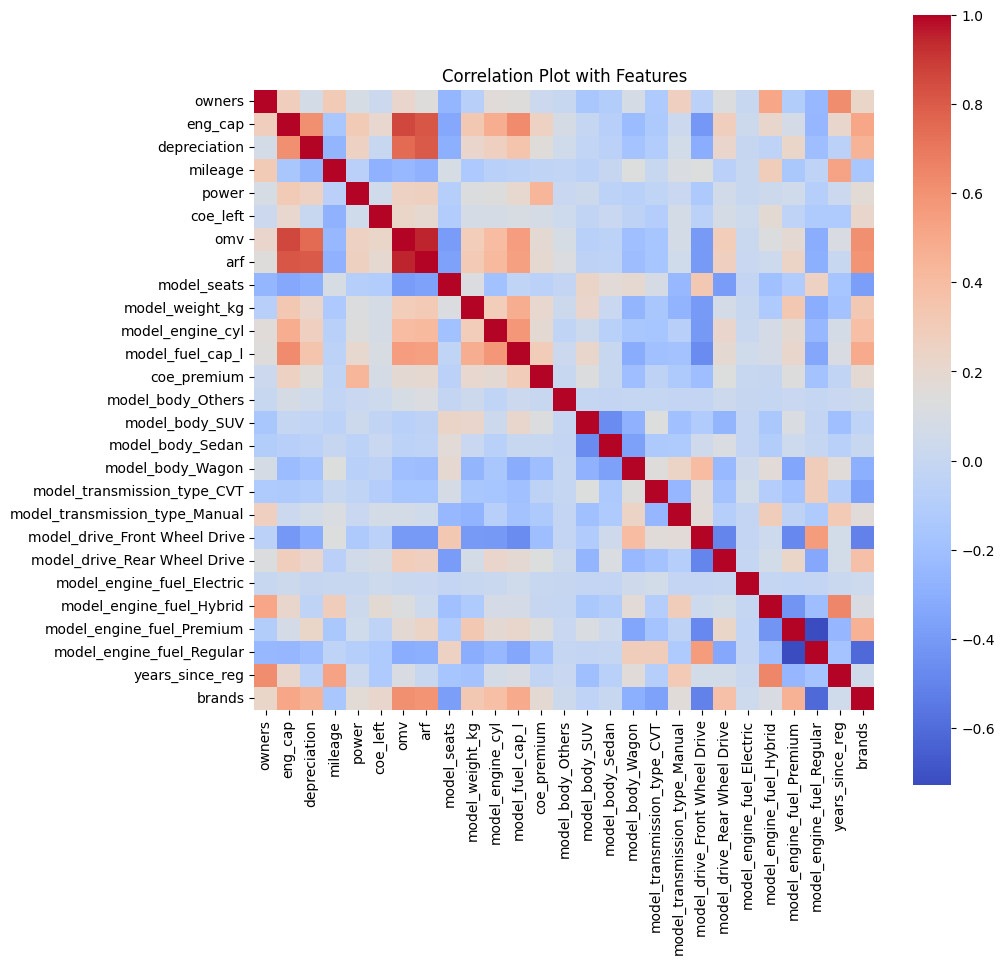

In [26]:
# plotting correlation heatmap between numeric variables

independent_vars = data.drop(columns=['price'])

correlation = independent_vars.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, cmap="coolwarm")
plt.title("Correlation Plot with Features")

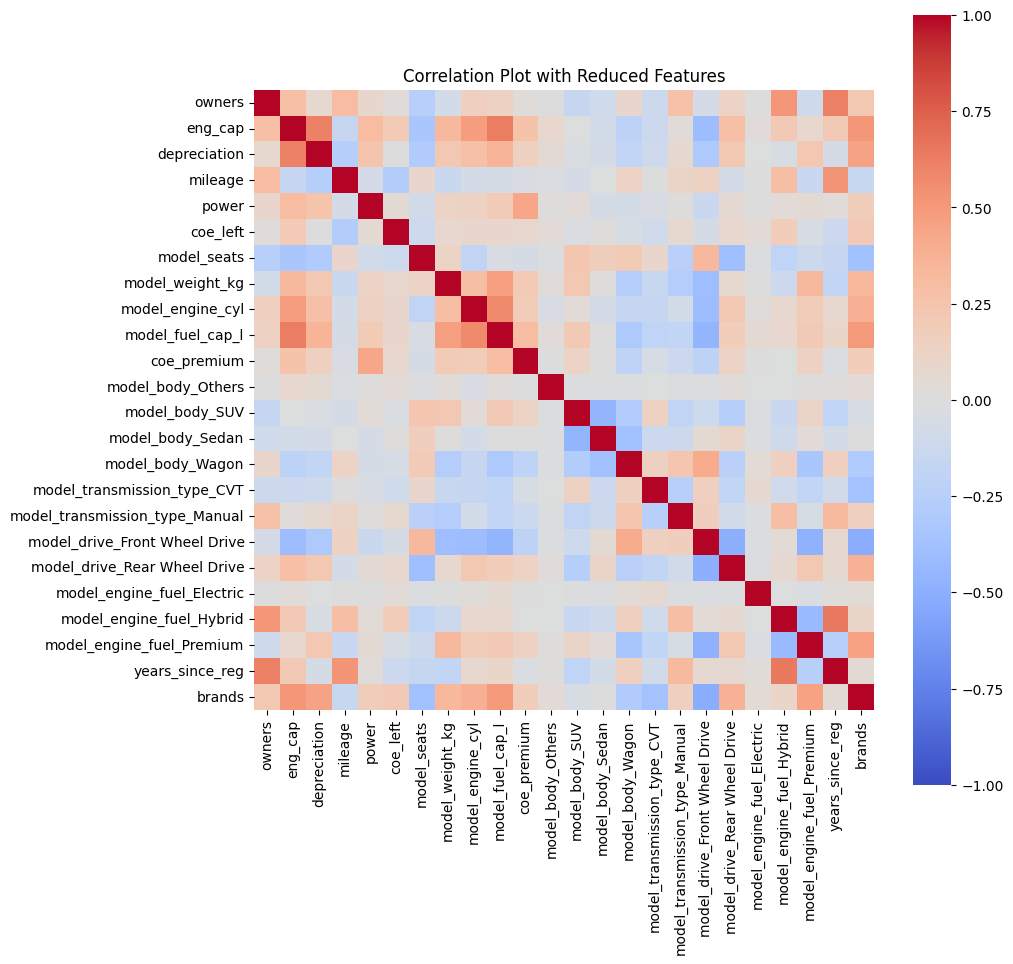

In [27]:
#identify pairs of highly correlated features
threshold = 0.7
upper = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(bool))

# find columns with correlation greater than the threshold
to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]

# remove these columns from the DataFrame
independent_vars = independent_vars.drop(columns=to_drop)

# calculate the corr again
corr_reduced = independent_vars.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_reduced, vmax=1, vmin=-1, square=True, cmap="coolwarm")
plt.title('Correlation Plot with Reduced Features')
plt.show()

In [28]:
Y = np.log(data['price'])

# Linear Regression

In [29]:
# split the data up for testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_LR_train, X_LR_test, y_LR_train, y_LR_test = train_test_split(independent_vars, Y, test_size=0.2, random_state=42)

MAE: 0.1556989910674313
MSE: 0.07523334900730244
RMSE: 0.27428698293448495
R^2: 0.8592957356699448
Adjusted R^2: 0.8568888202430586


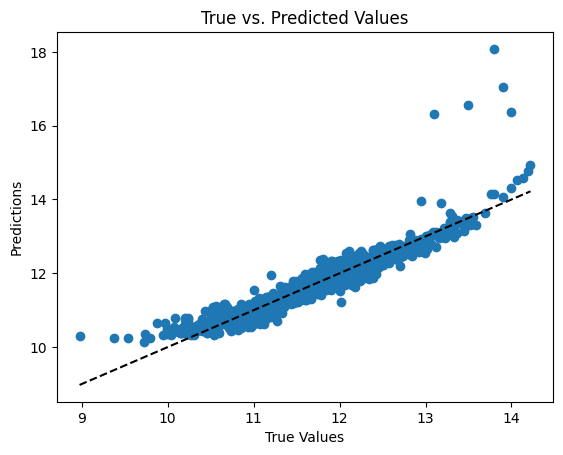

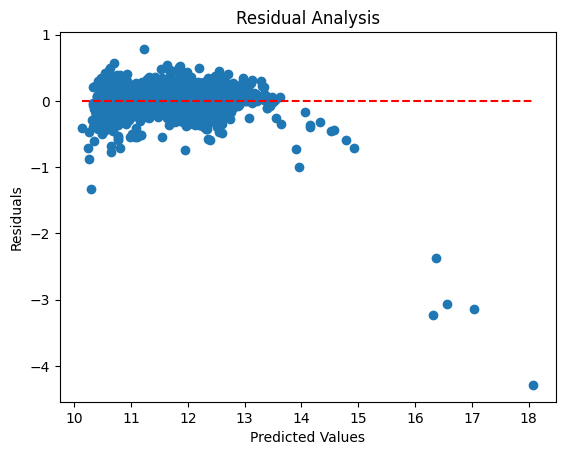

,owners,eng_cap,price,depreciation,mileage,power,coe_left,omv,arf,model_seats,model_weight_kg,model_engine_cyl,model_fuel_cap_l,coe_premium,model_body_Others,model_body_SUV,model_body_Sedan,model_body_Wagon,model_transmission_type_CVT,model_transmission_type_Manual,model_drive_Front Wheel Drive,model_drive_Rear Wheel Drive,model_engine_fuel_Electric,model_engine_fuel_Hybrid,model_engine_fuel_Premium,model_engine_fuel_Regular,years_since_reg,brands,predicted_price
0,6,1984.0,83800.0,16750.0,117160.0,132.0,5.00,38191.0,40468.0,5,1689.795918,4,74.9430,97000,False,False,True,False,True,False,False,False,False,False,True,False,11,2.0,84070.974359
1,1,1984.0,120800.0,13380.0,75500.0,132.0,9.02,38168.0,40436.0,5,1689.795918,4,74.9430,102001,False,False,True,False,True,False,False,False,False,False,True,False,11,2.0,149167.605004
2,6,1984.0,129800.0,14870.0,142926.0,155.0,8.72,45182.0,45182.0,5,1591.383220,4,63.9665,102001,False,False,True,False,True,False,False,False,False,False,True,False,11,2.0,137505.767701
3,6,1984.0,121800.0,13970.0,142926.0,155.0,8.71,45182.0,45182.0,5,1591.383220,4,63.9665,102001,False,False,True,False,True,False,False,False,False,False,True,False,11,2.0,135763.064354
4,1,3456.0,260000.0,36670.0,72000.0,264.0,4.04,139546.0,223183.0,5,2134.693878,6,82.1345,102001,False,False,True,False,False,False,False,True,False,False,True,False,6,2.0,173831.932763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9550,1,1598.0,88900.0,15090.0,80885.0,96.0,5.18,20881.0,21234.0,5,1287.981859,4,49.9620,94010,False,False,True,False,True,False,True,False,False,False,False,True,5,1.0,81137.041584
9551,2,1598.0,61800.0,14600.0,77000.0,96.0,3.46,21690.0,22366.0,5,1299.319728,4,49.9620,94010,False,False,True,False,True,False,True,False,False,False,False,True,7,1.0,56566.417632
9552,3,1598.0,52800.0,14410.0,99000.0,90.0,2.97,19990.0,19990.0,5,1299.319728,4,49.9620,94010,False,False,True,False,True,False,True,False,False,False,False,True,7,1.0,52001.491421
9553,3,1598.0,53800.0,14760.0,99000.0,90.0,2.97,19990.0,19990.0,5,1299.319728,4,49.9620,94010,False,False,True,False,True,False,True,False,False,False,False,True,7,1.0,52230.827681


In [30]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X_LR_train, y_LR_train)
y_LR_pred = linear_regressor.predict(X_LR_test)

# Calculate R-squared
n_LR = X_LR_test.shape[0]  # number of observations
p_LR = X_LR_test.shape[1]  # number of features
mae_LR = mean_absolute_error(y_LR_test, y_LR_pred)
mse_LR = mean_squared_error(y_LR_test, y_LR_pred)
rmse_LR = mean_squared_error(y_LR_test, y_LR_pred, squared=False)
r2_LR = r2_score(y_LR_test, y_LR_pred)
adjusted_r2_LR = 1 - (1 - r2_LR) * ((n_LR - 1) / (n_LR - p_LR - 1))
print(f"MAE: {mae_LR}")
print(f"MSE: {mse_LR}")
print(f"RMSE: {rmse_LR}")
print(f"R^2: {r2_LR}")
print(f"Adjusted R^2: {adjusted_r2_LR}")

#plotting True VS Predicted
plt.scatter(y_LR_test, y_LR_pred)
plt.plot([y_LR_test.min(), y_LR_test.max()], [y_LR_test.min(), y_LR_test.max()], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values')
plt.show()

# Residual plot
residuals_LR = y_LR_test - y_LR_pred
plt.scatter(y_LR_pred, residuals_LR)
plt.hlines(y=0, xmin=y_LR_pred.min(), xmax=y_LR_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

# test back on the dataset
x = independent_vars 
predicted_price_LR = linear_regressor.predict(x)
linear_regressor_predicted = data.copy()
linear_regressor_predicted['predicted_price'] = np.exp(predicted_price_LR)
linear_regressor_predicted

# Best Lasso

In [31]:
# split the data up for testing

X_Lasso_train, X_Lasso_test, y_Lasso_train, y_Lasso_test = train_test_split(independent_vars, Y, test_size=0.2, random_state=42)

Best alpha: 0.001
MAE: 0.1557091700619537
MSE: 0.07578647013346744
RMSE: 0.27529342551805963
R^2: 0.8582612675494985
Adjusted R^2: 0.8558366563030181


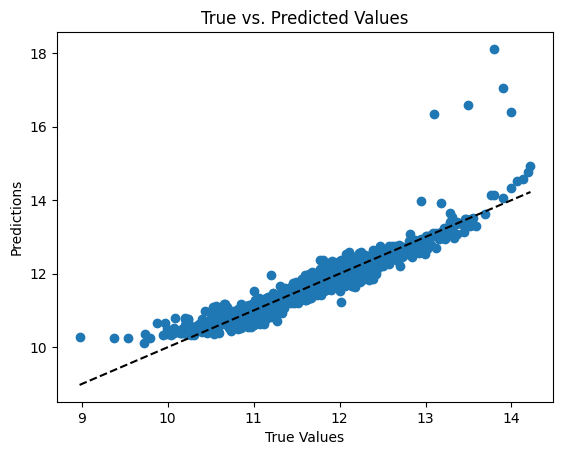

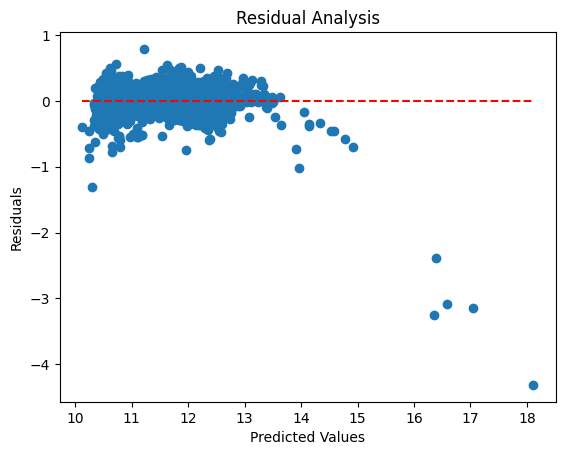

,owners,eng_cap,price,depreciation,mileage,power,coe_left,omv,arf,model_seats,model_weight_kg,model_engine_cyl,model_fuel_cap_l,coe_premium,model_body_Others,model_body_SUV,model_body_Sedan,model_body_Wagon,model_transmission_type_CVT,model_transmission_type_Manual,model_drive_Front Wheel Drive,model_drive_Rear Wheel Drive,model_engine_fuel_Electric,model_engine_fuel_Hybrid,model_engine_fuel_Premium,model_engine_fuel_Regular,years_since_reg,brands,predicted_price
0,6,1984.0,83800.0,16750.0,117160.0,132.0,5.00,38191.0,40468.0,5,1689.795918,4,74.9430,97000,False,False,True,False,True,False,False,False,False,False,True,False,11,2.0,84220.533853
1,1,1984.0,120800.0,13380.0,75500.0,132.0,9.02,38168.0,40436.0,5,1689.795918,4,74.9430,102001,False,False,True,False,True,False,False,False,False,False,True,False,11,2.0,149677.688922
2,6,1984.0,129800.0,14870.0,142926.0,155.0,8.72,45182.0,45182.0,5,1591.383220,4,63.9665,102001,False,False,True,False,True,False,False,False,False,False,True,False,11,2.0,137916.368466
3,6,1984.0,121800.0,13970.0,142926.0,155.0,8.71,45182.0,45182.0,5,1591.383220,4,63.9665,102001,False,False,True,False,True,False,False,False,False,False,True,False,11,2.0,136161.027524
4,1,3456.0,260000.0,36670.0,72000.0,264.0,4.04,139546.0,223183.0,5,2134.693878,6,82.1345,102001,False,False,True,False,False,False,False,True,False,False,True,False,6,2.0,174598.414569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9550,1,1598.0,88900.0,15090.0,80885.0,96.0,5.18,20881.0,21234.0,5,1287.981859,4,49.9620,94010,False,False,True,False,True,False,True,False,False,False,False,True,5,1.0,81520.462274
9551,2,1598.0,61800.0,14600.0,77000.0,96.0,3.46,21690.0,22366.0,5,1299.319728,4,49.9620,94010,False,False,True,False,True,False,True,False,False,False,False,True,7,1.0,56966.827902
9552,3,1598.0,52800.0,14410.0,99000.0,90.0,2.97,19990.0,19990.0,5,1299.319728,4,49.9620,94010,False,False,True,False,True,False,True,False,False,False,False,True,7,1.0,52358.304136
9553,3,1598.0,53800.0,14760.0,99000.0,90.0,2.97,19990.0,19990.0,5,1299.319728,4,49.9620,94010,False,False,True,False,True,False,True,False,False,False,False,True,7,1.0,52590.233126


In [32]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


lasso = Lasso()
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

#looping through to find best alpha value
grid_search = GridSearchCV(estimator=lasso, param_grid=parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_Lasso_train, y_Lasso_train)

lasso = grid_search.best_estimator_
y_Lasso_pred = lasso.predict(X_Lasso_test)
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Calculate R-squared
n_Lasso = X_Lasso_test.shape[0]  # number of observations
p_Lasso = X_Lasso_test.shape[1]  # number of features
mae_Lasso = mean_absolute_error(y_Lasso_test, y_Lasso_pred)
mse_Lasso = mean_squared_error(y_Lasso_test, y_Lasso_pred)
rmse_Lasso = mean_squared_error(y_Lasso_test, y_Lasso_pred, squared=False)
r2_Lasso = r2_score(y_Lasso_test, y_Lasso_pred)
adjusted_r2_Lasso = 1 - (1 - r2_Lasso) * ((n_Lasso - 1) / (n_Lasso - p_Lasso - 1))
print(f"MAE: {mae_Lasso}")
print(f"MSE: {mse_Lasso}")
print(f"RMSE: {rmse_Lasso}")
print(f"R^2: {r2_Lasso}")
print(f"Adjusted R^2: {adjusted_r2_Lasso}")

#plotting True VS Predicted
plt.scatter(y_Lasso_test, y_Lasso_pred)
plt.plot([y_Lasso_test.min(), y_Lasso_test.max()], [y_Lasso_test.min(), y_Lasso_test.max()], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values')
plt.show()

# Residual plot
residuals_Lasso = y_Lasso_test - y_Lasso_pred
plt.scatter(y_Lasso_pred, residuals_Lasso)
plt.hlines(y=0, xmin=y_Lasso_pred.min(), xmax=y_Lasso_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

# test back on the dataset
x = independent_vars
predicted_price_Lasso = lasso.predict(x)
lasso_predicted_results = data.copy()
lasso_predicted_results['predicted_price'] = np.exp(predicted_price_Lasso)
lasso_predicted_results

# Decision Tree

In [33]:
# split the data up for testing

X_DT_train, X_DT_test, y_DT_train, y_DT_test = train_test_split(independent_vars, Y, test_size=0.2, random_state=42)

MAE: 0.06536394116354356
MSE: 0.013471507707664218
RMSE: 0.11606682431971772
R^2: 0.9748050750573449
Adjusted R^2: 0.9743740856071498


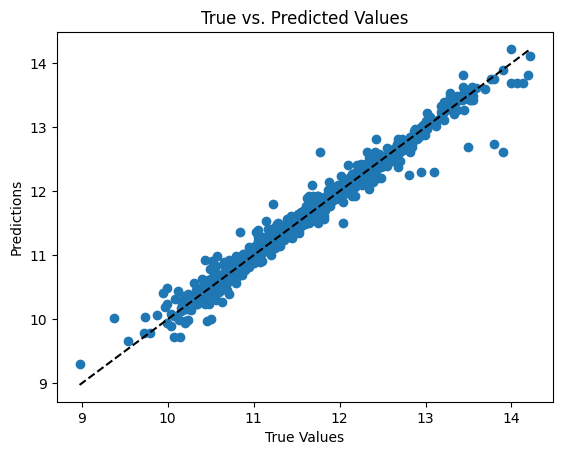

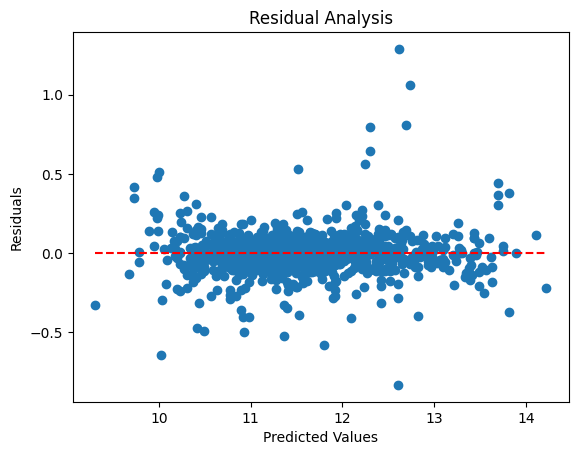

,owners,eng_cap,price,depreciation,mileage,power,coe_left,omv,arf,model_seats,model_weight_kg,model_engine_cyl,model_fuel_cap_l,coe_premium,model_body_Others,model_body_SUV,model_body_Sedan,model_body_Wagon,model_transmission_type_CVT,model_transmission_type_Manual,model_drive_Front Wheel Drive,model_drive_Rear Wheel Drive,model_engine_fuel_Electric,model_engine_fuel_Hybrid,model_engine_fuel_Premium,model_engine_fuel_Regular,years_since_reg,brands,predicted_price
0,6,1984.0,83800.0,16750.0,117160.0,132.0,5.00,38191.0,40468.0,5,1689.795918,4,74.9430,97000,False,False,True,False,True,False,False,False,False,False,True,False,11,2.0,83800.0
1,1,1984.0,120800.0,13380.0,75500.0,132.0,9.02,38168.0,40436.0,5,1689.795918,4,74.9430,102001,False,False,True,False,True,False,False,False,False,False,True,False,11,2.0,120800.0
2,6,1984.0,129800.0,14870.0,142926.0,155.0,8.72,45182.0,45182.0,5,1591.383220,4,63.9665,102001,False,False,True,False,True,False,False,False,False,False,True,False,11,2.0,129800.0
3,6,1984.0,121800.0,13970.0,142926.0,155.0,8.71,45182.0,45182.0,5,1591.383220,4,63.9665,102001,False,False,True,False,True,False,False,False,False,False,True,False,11,2.0,121800.0
4,1,3456.0,260000.0,36670.0,72000.0,264.0,4.04,139546.0,223183.0,5,2134.693878,6,82.1345,102001,False,False,True,False,False,False,False,True,False,False,True,False,6,2.0,260000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9550,1,1598.0,88900.0,15090.0,80885.0,96.0,5.18,20881.0,21234.0,5,1287.981859,4,49.9620,94010,False,False,True,False,True,False,True,False,False,False,False,True,5,1.0,87889.0
9551,2,1598.0,61800.0,14600.0,77000.0,96.0,3.46,21690.0,22366.0,5,1299.319728,4,49.9620,94010,False,False,True,False,True,False,True,False,False,False,False,True,7,1.0,61800.0
9552,3,1598.0,52800.0,14410.0,99000.0,90.0,2.97,19990.0,19990.0,5,1299.319728,4,49.9620,94010,False,False,True,False,True,False,True,False,False,False,False,True,7,1.0,52800.0
9553,3,1598.0,53800.0,14760.0,99000.0,90.0,2.97,19990.0,19990.0,5,1299.319728,4,49.9620,94010,False,False,True,False,True,False,True,False,False,False,False,True,7,1.0,52800.0


In [34]:
from sklearn.tree import DecisionTreeRegressor


dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_DT_train, y_DT_train)
y_DT_pred = dt_regressor.predict(X_DT_test)

#Calculating R Squared
n_DT = X_DT_test.shape[0]  # number of observations
p_DT = X_DT_test.shape[1]  # number of features
mae_DT = mean_absolute_error(y_DT_test, y_DT_pred)
mse_DT = mean_squared_error(y_DT_test, y_DT_pred)
rmse_DT = mean_squared_error(y_DT_test, y_DT_pred, squared=False)
r2_DT = r2_score(y_DT_test, y_DT_pred)
adjusted_r2_DT = 1 - (1 - r2_DT) * ((n_DT - 1) / (n_DT - p_DT - 1))
print(f"MAE: {mae_DT}")
print(f"MSE: {mse_DT}")
print(f"RMSE: {rmse_DT}")
print(f"R^2: {r2_DT}")
print(f"Adjusted R^2: {adjusted_r2_DT}")

#plotting True VS Predicted
plt.scatter(y_DT_test, y_DT_pred)
plt.plot([y_DT_test.min(), y_DT_test.max()], [y_DT_test.min(), y_DT_test.max()], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values')
plt.show()

# Residual plot
residuals_DT = y_DT_test - y_DT_pred
plt.scatter(y_DT_pred, residuals_DT)
plt.hlines(y=0, xmin=y_DT_pred.min(), xmax=y_DT_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

# test back on the dataset
x = independent_vars
predicted_price_DT = dt_regressor.predict(x)
dt_predicted = data.copy()
dt_predicted['predicted_price'] = np.exp(predicted_price_DT)
dt_predicted

# Random Forest

In [35]:
# split the data up for testing

X_RF_train, X_RF_test, y_RF_train, y_RF_test = train_test_split(independent_vars, Y, test_size=0.2, random_state=42)

MAE: 0.0420116450271582
MSE: 0.005771145268897812
RMSE: 0.07596805426557805
R^2: 0.9892065851099713
Adjusted R^2: 0.9890219507854091


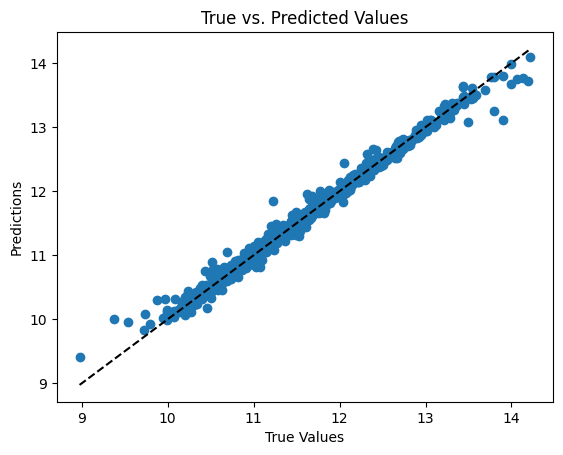

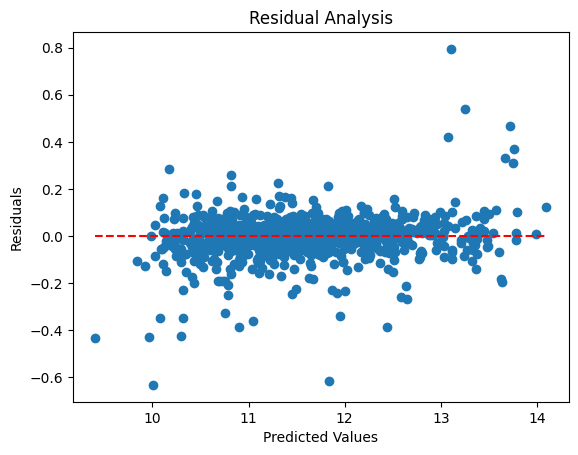

,owners,eng_cap,price,depreciation,mileage,power,coe_left,omv,arf,model_seats,model_weight_kg,model_engine_cyl,model_fuel_cap_l,coe_premium,model_body_Others,model_body_SUV,model_body_Sedan,model_body_Wagon,model_transmission_type_CVT,model_transmission_type_Manual,model_drive_Front Wheel Drive,model_drive_Rear Wheel Drive,model_engine_fuel_Electric,model_engine_fuel_Hybrid,model_engine_fuel_Premium,model_engine_fuel_Regular,years_since_reg,brands,predicted_price
0,6,1984.0,83800.0,16750.0,117160.0,132.0,5.00,38191.0,40468.0,5,1689.795918,4,74.9430,97000,False,False,True,False,True,False,False,False,False,False,True,False,11,2.0,84818.464974
1,1,1984.0,120800.0,13380.0,75500.0,132.0,9.02,38168.0,40436.0,5,1689.795918,4,74.9430,102001,False,False,True,False,True,False,False,False,False,False,True,False,11,2.0,124306.434353
2,6,1984.0,129800.0,14870.0,142926.0,155.0,8.72,45182.0,45182.0,5,1591.383220,4,63.9665,102001,False,False,True,False,True,False,False,False,False,False,True,False,11,2.0,135374.915602
3,6,1984.0,121800.0,13970.0,142926.0,155.0,8.71,45182.0,45182.0,5,1591.383220,4,63.9665,102001,False,False,True,False,True,False,False,False,False,False,True,False,11,2.0,124923.595712
4,1,3456.0,260000.0,36670.0,72000.0,264.0,4.04,139546.0,223183.0,5,2134.693878,6,82.1345,102001,False,False,True,False,False,False,False,True,False,False,True,False,6,2.0,233582.731688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9550,1,1598.0,88900.0,15090.0,80885.0,96.0,5.18,20881.0,21234.0,5,1287.981859,4,49.9620,94010,False,False,True,False,True,False,True,False,False,False,False,True,5,1.0,89501.157264
9551,2,1598.0,61800.0,14600.0,77000.0,96.0,3.46,21690.0,22366.0,5,1299.319728,4,49.9620,94010,False,False,True,False,True,False,True,False,False,False,False,True,7,1.0,60987.082125
9552,3,1598.0,52800.0,14410.0,99000.0,90.0,2.97,19990.0,19990.0,5,1299.319728,4,49.9620,94010,False,False,True,False,True,False,True,False,False,False,False,True,7,1.0,52773.701101
9553,3,1598.0,53800.0,14760.0,99000.0,90.0,2.97,19990.0,19990.0,5,1299.319728,4,49.9620,94010,False,False,True,False,True,False,True,False,False,False,False,True,7,1.0,53284.366551


In [36]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees
rf_regressor.fit(X_RF_train, y_RF_train)
y_RF_pred = rf_regressor.predict(X_RF_test)

# Calculating R-Squared
n_RF = X_RF_test.shape[0]  # number of observations
p_RF = X_RF_test.shape[1]  # number of features
mae_RF = mean_absolute_error(y_RF_test, y_RF_pred)
mse_RF = mean_squared_error(y_RF_test, y_RF_pred)
rmse_RF = mean_squared_error(y_RF_test, y_RF_pred, squared=False)
r2_RF = r2_score(y_RF_test, y_RF_pred)
adjusted_r2_RF = 1 - (1 - r2_RF) * ((n_RF - 1) / (n_RF - p_RF - 1))
print(f"MAE: {mae_RF}")
print(f"MSE: {mse_RF}")
print(f"RMSE: {rmse_RF}")
print(f"R^2: {r2_RF}")
print(f"Adjusted R^2: {adjusted_r2_RF}")

#plotting True VS Predicted
plt.scatter(y_RF_test, y_RF_pred)
plt.plot([y_RF_test.min(), y_RF_test.max()], [y_RF_test.min(), y_RF_test.max()], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values')
plt.show()

# Residual plot
residuals_RF = y_RF_test - y_RF_pred
plt.scatter(y_RF_pred, residuals_RF)
plt.hlines(y=0, xmin=y_RF_pred.min(), xmax=y_RF_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

# test back on the dataset
x = independent_vars
predicted_price_RF = rf_regressor.predict(x)
rf_predicted = data.copy()
rf_predicted['predicted_price'] = np.exp(predicted_price_RF)
rf_predicted

# Gradient Boosting

In [37]:
# split the data up for testing

X_GB_train, X_GB_test, y_GB_train, y_GB_test = train_test_split(independent_vars, Y, test_size=0.2, random_state=42)

MAE: 0.05874027997699114
MSE: 0.008149980790499117
RMSE: 0.09027724403469081
R^2: 0.9847575966434785
Adjusted R^2: 0.9844968570279714


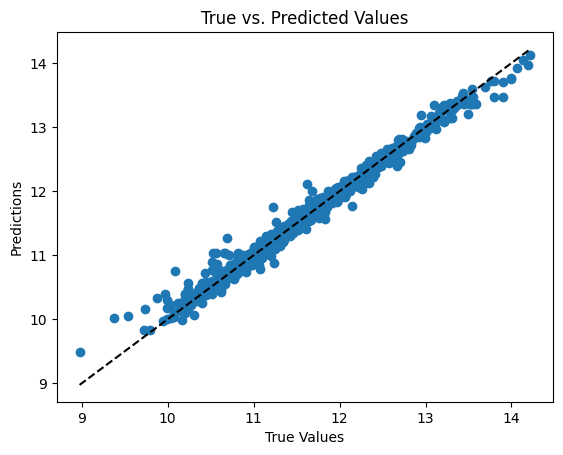

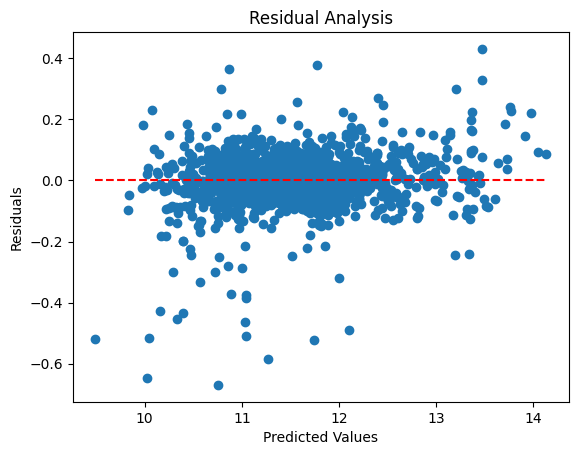

,owners,eng_cap,price,depreciation,mileage,power,coe_left,omv,arf,model_seats,model_weight_kg,model_engine_cyl,model_fuel_cap_l,coe_premium,model_body_Others,model_body_SUV,model_body_Sedan,model_body_Wagon,model_transmission_type_CVT,model_transmission_type_Manual,model_drive_Front Wheel Drive,model_drive_Rear Wheel Drive,model_engine_fuel_Electric,model_engine_fuel_Hybrid,model_engine_fuel_Premium,model_engine_fuel_Regular,years_since_reg,brands,predicted_price
0,6,1984.0,83800.0,16750.0,117160.0,132.0,5.00,38191.0,40468.0,5,1689.795918,4,74.9430,97000,False,False,True,False,True,False,False,False,False,False,True,False,11,2.0,74107.119100
1,1,1984.0,120800.0,13380.0,75500.0,132.0,9.02,38168.0,40436.0,5,1689.795918,4,74.9430,102001,False,False,True,False,True,False,False,False,False,False,True,False,11,2.0,130081.708451
2,6,1984.0,129800.0,14870.0,142926.0,155.0,8.72,45182.0,45182.0,5,1591.383220,4,63.9665,102001,False,False,True,False,True,False,False,False,False,False,True,False,11,2.0,142185.203639
3,6,1984.0,121800.0,13970.0,142926.0,155.0,8.71,45182.0,45182.0,5,1591.383220,4,63.9665,102001,False,False,True,False,True,False,False,False,False,False,True,False,11,2.0,142185.203639
4,1,3456.0,260000.0,36670.0,72000.0,264.0,4.04,139546.0,223183.0,5,2134.693878,6,82.1345,102001,False,False,True,False,False,False,False,True,False,False,True,False,6,2.0,210634.074814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9550,1,1598.0,88900.0,15090.0,80885.0,96.0,5.18,20881.0,21234.0,5,1287.981859,4,49.9620,94010,False,False,True,False,True,False,True,False,False,False,False,True,5,1.0,90943.559321
9551,2,1598.0,61800.0,14600.0,77000.0,96.0,3.46,21690.0,22366.0,5,1299.319728,4,49.9620,94010,False,False,True,False,True,False,True,False,False,False,False,True,7,1.0,60405.529370
9552,3,1598.0,52800.0,14410.0,99000.0,90.0,2.97,19990.0,19990.0,5,1299.319728,4,49.9620,94010,False,False,True,False,True,False,True,False,False,False,False,True,7,1.0,53267.302323
9553,3,1598.0,53800.0,14760.0,99000.0,90.0,2.97,19990.0,19990.0,5,1299.319728,4,49.9620,94010,False,False,True,False,True,False,True,False,False,False,False,True,7,1.0,54744.282246


In [38]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)  # 100 trees
gb_regressor.fit(X_GB_train, y_GB_train)
y_GB_pred = gb_regressor.predict(X_GB_test)

# Calculating R-Squared
n_GB = X_GB_test.shape[0]  # number of observations
p_GB = X_GB_test.shape[1]  # number of features
mae_GB = mean_absolute_error(y_GB_test, y_GB_pred)
mse_GB = mean_squared_error(y_GB_test, y_GB_pred)
rmse_GB = mean_squared_error(y_GB_test, y_GB_pred, squared=False)
r2_GB = r2_score(y_GB_test, y_GB_pred)
adjusted_r2_GB = 1 - (1 - r2_GB) * ((n_GB - 1) / (n_GB - p_GB - 1))
print(f"MAE: {mae_GB}")
print(f"MSE: {mse_GB}")
print(f"RMSE: {rmse_GB}")
print(f"R^2: {r2_GB}")
print(f"Adjusted R^2: {adjusted_r2_GB}")

#plotting True VS Predicted
plt.scatter(y_GB_test, y_GB_pred)
plt.plot([y_GB_test.min(), y_GB_test.max()], [y_GB_test.min(), y_GB_test.max()], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values')
plt.show()

# Residual plot
residuals_GB = y_GB_test - y_GB_pred
plt.scatter(y_GB_pred, residuals_GB)
plt.hlines(y=0, xmin=y_GB_pred.min(), xmax=y_GB_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

# test back on the dataset
x = independent_vars
predicted_price_GB = gb_regressor.predict(x)
gb_predicted = data.copy()
gb_predicted['predicted_price'] = np.exp(predicted_price_GB)
gb_predicted